In [1]:
#Library Used in all Code
import numpy as np
import pandas as pd

#Used In Rule of Mixtures
import pymatgen as pymat
import mendeleev as mendel

#Random
np.random.seed(44) # Random Seed1
import random

# PLOTTING (MATPLOTLIB)
%matplotlib inline
import matplotlib.animation as animation
from IPython.display import HTML

# PLOTTING (PLOTLY)
import plotly 
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

# ML
from lolopy.learners import RandomForestRegressor

# Meltheas TOOL
from simtool import findInstalledSimToolNotebooks, searchForSimTool
from simtool import getSimToolInputs, getSimToolOutputs, Run

MeltHEA = searchForSimTool('meltheas')
from IPython.display import clear_output
from IPython.display import display
from hublib.ui import FileUpload
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

<IPython.core.display.Javascript object>

# Import Initial Dataset 

In [2]:
#Get initial set for testing data
initial_data = pd.read_csv('NewSmallCompistionDataSet.csv')
initial_data = initial_data.drop(['Solid Tm'], axis=1)
initial_data = initial_data.drop(['Liquid Tm'], axis=1)
initial_data = initial_data.drop(['Minus'], axis=1)
initial_data = initial_data.drop(['Plus'], axis=1)
initial_data = initial_data.drop(['Unnamed: 0'], axis=1)
compared_df = initial_data.drop(['Simulated Tm'], axis=1)
#display(initial_data)

# All Plausible Compisition Creator

In [3]:
#Create lines to get values with .1 step size
nx = 11
x1 = np.linspace(0, 1, nx)
y, y1, y2, y3, y4 = np.meshgrid(x1, x1, x1, x1, x1)
positions = np.vstack([y.ravel(), y1.ravel(), y2.ravel(), y3.ravel(), y4.ravel()]).T

#Make dataframe with limits of all possible compistions combinations
all_permutations = pd.DataFrame(positions)
all_permutations["sum"]= all_permutations.sum(axis = 1)
plausible_compositions = all_permutations[all_permutations["sum"] == 1]

plausible_compositions = plausible_compositions[plausible_compositions[0] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[1] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[2] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[3] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[4] <= 0.5]

plausible_compositions = plausible_compositions.round(1)

plausible_compositions = plausible_compositions.drop(["sum"], axis = 1)
initial_plausible_compositions = plausible_compositions
#display(plausible_compositions)

# Apply Rule of Mixtures to Compositions

In [4]:
#string to select characteristics
actual_qued_values = ['youngs_modulus', 'atomic_radius', 'electrical_resistivity','CTE','hardness','boiling_point',
                         'atomic_mass','poissons_ratio','density_of_solid','en_gosh','melting_point']

sample = ['Cr', 'Co', 'Cu', 'Fe', 'Ni']

def get_discriptors(input_string,sample):
    #dictionary values to choose from
    string_dict = ['bulk_modulus','youngs_modulus','CTE','thermal_conductivity','boiling_point','critical_temperature',
                  'vdw_radius','average_ionic_radius','atomic_radius','atomic_number','atomic_mass','molar_volume', 
                   'density_of_solid','hardness','poissons_ratio','period','group','en_gosh','electrical_resistivity', 'melting_point']

    #Creation of dictionary
    data_set = {}

    #Make dict of lists
    for length_string in range(len(string_dict)):
        data_set[string_dict[length_string]] = []

    #all plausbile compositions from before
    df2 = plausible_compositions

    #list of all things
    que_values = []

    for item in sample:
        element_object = pymat.Element(item)
        data_set[string_dict[0]].append(element_object.bulk_modulus) #bulk_modulus
        data_set[string_dict[1]].append(element_object.youngs_modulus) #youngs_modulus
        data_set[string_dict[2]].append(element_object.coefficient_of_linear_thermal_expansion) #CTE
        data_set[string_dict[3]].append(element_object.thermal_conductivity) #thermal conductivity
        data_set[string_dict[4]].append(element_object.boiling_point) #boiling_point
        data_set[string_dict[5]].append(element_object.critical_temperature) #critical temperature
        data_set[string_dict[6]].append(element_object.van_der_waals_radius) #vander wall radius
        data_set[string_dict[7]].append(element_object.average_ionic_radius) #average ionic radius
        data_set[string_dict[8]].append(element_object.atomic_radius) #atomic radius
        data_set[string_dict[9]].append(element_object.Z) #atomic number
        data_set[string_dict[10]].append(element_object.atomic_mass) #atomic mass
        data_set[string_dict[11]].append(element_object.molar_volume) #molar volume
        data_set[string_dict[12]].append(element_object.density_of_solid) #density_solid
        data_set[string_dict[13]].append(element_object.brinell_hardness) #brinell_hardness
        data_set[string_dict[14]].append(element_object.poissons_ratio) #poissons_ratio
        data_set[string_dict[15]].append(element_object.row) #period
        data_set[string_dict[16]].append(element_object.group) #group
        data_set[string_dict[17]].append(element_object.X) #en_gosh
        data_set[string_dict[18]].append(element_object.electrical_resistivity) #electrical_resistivity
        data_set[string_dict[19]].append(element_object.melting_point) #melting_point

    for discript in input_string:
        que_values.append(data_set[discript])

    df = pd.DataFrame(data = que_values, columns = sample, index = input_string) 
    display(df)
    return df

discriptors_df = get_discriptors(actual_qued_values,sample)

,Cr,Co,Cu,Fe,Ni
youngs_modulus,2.790000e+02,2.090000e+02,1.300000e+02,2.110000e+02,2.000000e+02
atomic_radius,1.400000e+00,1.350000e+00,1.350000e+00,1.400000e+00,1.350000e+00
electrical_resistivity,1.270000e-07,6.000000e-08,1.720000e-08,1.000000e-07,7.200000e-08
CTE,4.900000e-06,1.300000e-05,1.650000e-05,1.180000e-05,1.340000e-05
hardness,1.120000e+03,7.000000e+02,8.740000e+02,4.900000e+02,7.000000e+02
boiling_point,2.944000e+03,3.200000e+03,3.200000e+03,3.134000e+03,3.186000e+03
atomic_mass,5.199610e+01,5.893319e+01,6.354600e+01,5.584500e+01,5.869340e+01
poissons_ratio,2.100000e-01,3.100000e-01,3.400000e-01,2.900000e-01,3.100000e-01
density_of_solid,7.140000e+03,8.900000e+03,8.920000e+03,7.874000e+03,8.908000e+03
en_gosh,1.660000e+00,1.880000e+00,1.900000e+00,1.830000e+00,1.910000e+00


In [ ]:
#Rename df to match other dataframes
plausible_compositions = plausible_compositions.rename(columns = {0:'Cr',1:'Co',2:'Cu',3:'Fe', 4:'Ni'})

#Taking out replicas
df = pd.merge(plausible_compositions, compared_df, how='left', indicator = 'Exsist')
df = df[df['Exsist'] != 'both']
plausible_compositions = df.drop(['Exsist'], axis = 1)

#display(plausible_compositions)

# Applying Rule of Mixture

In [ ]:
#Applu Rule of Mixtures
def rule_mixtures(df2,df,sample): 
    #Creator column of first rule mixture discriptor to concat to
    cr = 0
    for comps in sample:
        cr = cr+df2[comps]*df[comps][0]
    cr = cr.to_frame()

    #Concat rest of compistions with rule of mixtures applied
    for x in range(1,len(actual_qued_values)):
        cf = 0
        for comps in sample:
            cf = cf + df2[comps]*df[comps][x]
        cf.to_frame()
        cr = pd.concat([cr,cf], axis=1)

    #Renames columns to discriptors
    cr.columns = actual_qued_values
    return cr

plausible_compositions_rule_mixtures = rule_mixtures(plausible_compositions,discriptors_df,sample)
known_compositions_rule_mixtures = rule_mixtures(compared_df,discriptors_df,sample)
#display(plausible_compositions_rule_mixtures)

# Data Preperation

In [ ]:
#Concatinate values
all_rule_mixtures = pd.concat([known_compositions_rule_mixtures,plausible_compositions_rule_mixtures])
all_compositions = pd.concat([compared_df,plausible_compositions])

#Experimental melting temperatures [K]
T_m_Cr = 2180
T_m_Co = 1768
T_m_Cu = 1358
T_m_Fe = 1811
T_m_Ni = 1728

#display(all_compositions)

In [ ]:
#Set testing and training data
all_values = all_rule_mixtures.values.tolist()
all_labels = initial_data['Simulated Tm'].tolist()

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float)
all_labels = np.array(all_labels, dtype = float)

create_label = np.zeros((plausible_compositions_rule_mixtures.shape[0],), dtype = int)
all_labels = np.concatenate((all_labels,create_label), axis = 0)
#display(all_compositions)

# Getting CSVS for Sequential Learning

In [ ]:
import glob
import os
import os.path, time

list_seq_learn = []

#path = '/home/nanohub/dfarache/Random_Active_Learn/Untitled Folder/'
path = os.getcwd()

print(path)

list_of_files = sorted(os.listdir(path), key=os.path.getctime)
for docs in list_of_files:
    if 'melting_8labels' in docs:
        list_seq_learn.append(docs)
print(list_seq_learn)

/home/nanohub/dfarache/Random_Active_Learn/Untitled Folder/50picoRuns_RandomSeeds/Random_datasetCreatorForPaper
['Random_melting_8labels50pico0.csv', 'Random_melting_8labels50pico1.csv', 'Random_melting_8labels50pico2.csv', 'Random_melting_8labels50pico3.csv', 'Random_melting_8labels50pico4.csv', 'Random_melting_8labels50pico5.csv']


# Random Forest Creation and Prediction

In [ ]:
X = all_values.copy() #discriptors
y = all_labels.copy() #all labels  

# assign values
model = RandomForestRegressor(num_trees = 350) #model if iterate through
#print(model.__init__)

entry_number_init = initial_data.shape[0] #starting point of initial data
in_train = np.zeros(len(X), dtype=np.bool) #make all false

in_train[:entry_number_init] = True #turns false to true 

#in_train[np.where(y!=0)] = True

print('Picked {} training entries'.format(in_train.sum()))

nsamples = in_train.sum()
train_fraction = 0.8
train_idx = int(train_fraction*nsamples)

print (X.shape, y.shape)


#Get previous runs of sequential and use them
if list_seq_learn:
    y_counter = 0
    seq_learn_data = pd.read_csv(list_seq_learn[-1])
    for val in seq_learn_data['Index']:
        in_train[val] = True
        y[val] = seq_learn_data['Simulated Tm'][y_counter]
        y_counter = y_counter + 1
    
    

# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)
#order = np.argsort(np.random.random(all_labels.shape)) # This numpy argsort returns the indexes that would be used to shuffle a list
#order = np.arange(nsamples)
#all_values = all_values[0:nsamples][order]
#all_labels = all_labels[0:nsamples][order]

model.fit(X[:train_idx, :], y[:train_idx])
test_pred, test_std = model.predict(X[train_idx:nsamples, :], return_std=True)
pred, std = model.predict(X, return_std=True)
#print(in_train)

Picked 39 training entries
(593, 11) (593,)


In [ ]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

layout0= go.Layout(title= "Melting Temperature", hovermode= 'closest',
    xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
    yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2), height=800, width=800, font=dict(size=22))

testing= go.Scatter(x = y[train_idx:nsamples], y = test_pred, mode = 'markers', marker= dict(size= 14, color= 'red', symbol = 'x'), 
                    name= "Testing Data", error_y=dict(type='data', array=test_std,visible=True))
everything = go.Scatter(x = y[:nsamples], y = pred, mode = 'markers', marker= dict(size= 14, color= 'blue', symbol = 'x'), 
                        name= "All Data", error_y=dict(type='data', array=std,visible=True))
match = go.Scatter(x = [1700,2300], y = [1700,2300], mode = 'lines', name = "Match", line= dict( color = 'black', dash='dash'))

traces = [everything,testing,match]
fig= go.Figure(traces, layout=layout0)
fig.update_yaxes(automargin=True)
iplot(fig)
#print(model.__dict__)

# Applying Acquisition Function

78
-------------------------------------------------------------
Experiment #  0
486
[0.0, 0.4, 0.2, 0.2, 0.2]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2e5e806a4f6844078223187f7895dab8/inputs.yaml
       RUNS/2e5e806a4f6844078223187f7895dab8
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/2e5e806a4f6844078223187f7895dab8/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [26:25<00:00, 63.42s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2e5e806a4f6844078223187f7895dab8/inputs.yaml
       RUNS/2e5e806a4f6844078223187f7895dab8
Predicted melting temperature for this potential:  2101.923360199005
95% confidence interval:  4.7460981062537915
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9878472222222222
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 2.300e+01 4.000e+00 2.300e+01 0.000e+00 4.552e+03 4.608e+03]


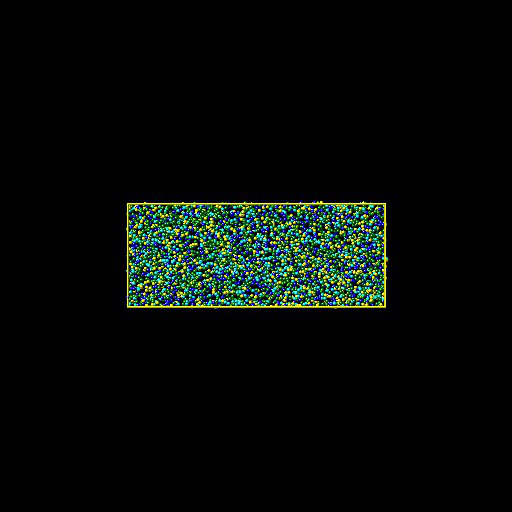

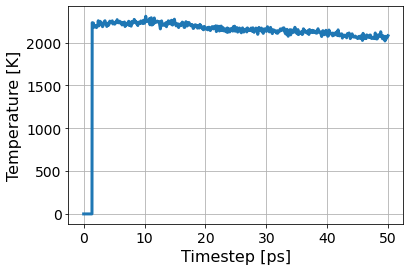

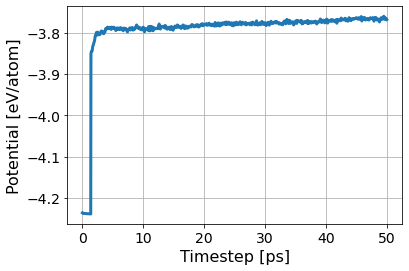

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/97bb953eba614631b7dc0f0310a6ab5c/inputs.yaml
       RUNS/97bb953eba614631b7dc0f0310a6ab5c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/97bb953eba614631b7dc0f0310a6ab5c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:25<00:00, 61.01s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/97bb953eba614631b7dc0f0310a6ab5c/inputs.yaml
       RUNS/97bb953eba614631b7dc0f0310a6ab5c
Predicted melting temperature for this potential:  2102.6392731343285
95% confidence interval:  3.2098375821492193
Fraction of system solid:  0.2934027777777778
Fraction of system liquid:  0.6924913194444444
Simulation Success Flag 0.0
Crystal Structure Info:  [1352.   37.   17.   11.    0. 3191. 4608.]


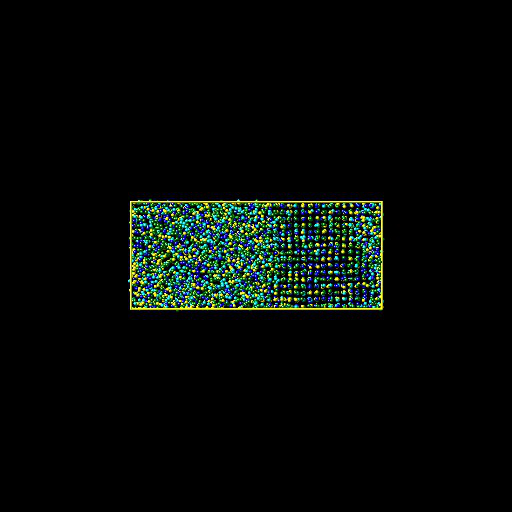

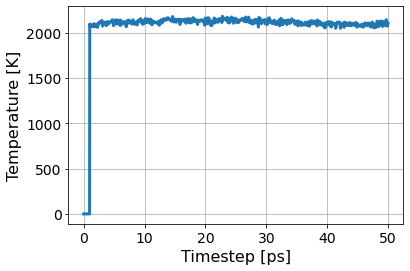

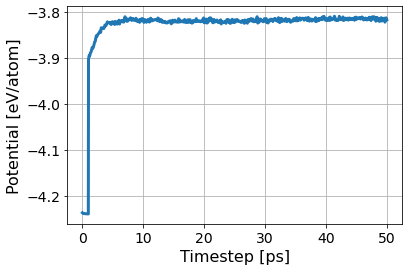

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c12c7b8cadb14da4acc37e2c9a4ffde3/inputs.yaml
       RUNS/c12c7b8cadb14da4acc37e2c9a4ffde3
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/c12c7b8cadb14da4acc37e2c9a4ffde3/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:51<00:00, 62.07s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c12c7b8cadb14da4acc37e2c9a4ffde3/inputs.yaml
       RUNS/c12c7b8cadb14da4acc37e2c9a4ffde3
Predicted melting temperature for this potential:  2101.3702865671644
95% confidence interval:  2.883309961191447
Fraction of system solid:  0.501953125
Fraction of system liquid:  0.4778645833333333
Simulation Success Flag 1.0
Crystal Structure Info:  [2313.   55.   29.    9.    0. 2202. 4608.]


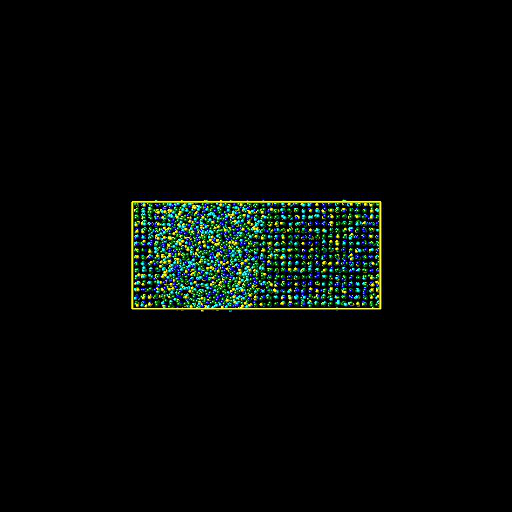

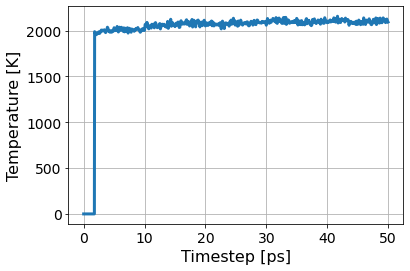

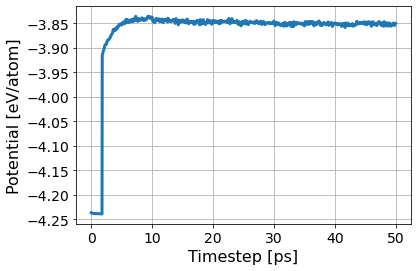

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  1
170
[0.5, 0.0, 0.2, 0.1, 0.2]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b75d80efdea44b899345d642007ce681/inputs.yaml
       RUNS/b75d80efdea44b899345d642007ce681
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b75d80efdea44b899345d642007ce681/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:26<00:00, 61.06s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b75d80efdea44b899345d642007ce681/inputs.yaml
       RUNS/b75d80efdea44b899345d642007ce681
Predicted melting temperature for this potential:  2079.235048756219
95% confidence interval:  2.6964946207530764
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.9921875
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 1.000e+01 2.000e+00 2.100e+01 1.000e+00 4.572e+03 4.608e+03]


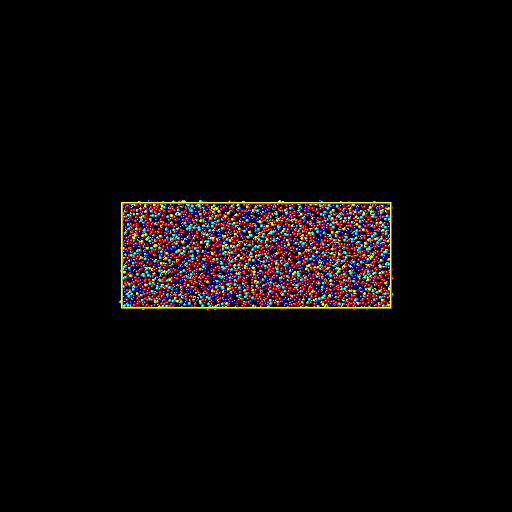

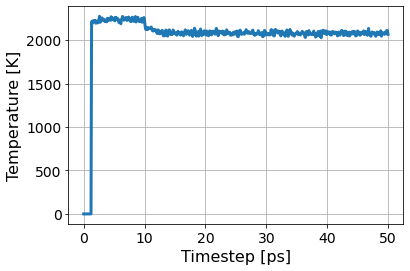

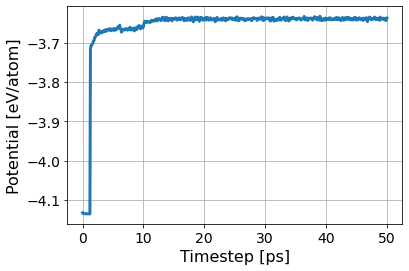

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/86c2ca3994904c43887d9292e39768e7/inputs.yaml
       RUNS/86c2ca3994904c43887d9292e39768e7
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/86c2ca3994904c43887d9292e39768e7/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:30<00:00, 61.21s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/86c2ca3994904c43887d9292e39768e7/inputs.yaml
       RUNS/86c2ca3994904c43887d9292e39768e7
Predicted melting temperature for this potential:  1955.761282089552
95% confidence interval:  2.3781077569027764
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9924045138888888
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 1.100e+01 2.000e+00 1.500e+01 1.000e+00 4.573e+03 4.608e+03]


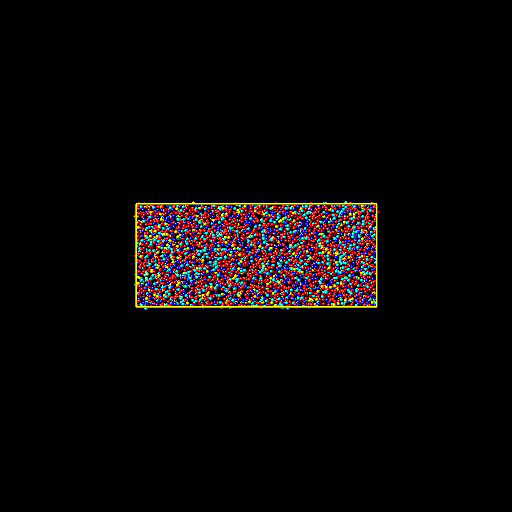

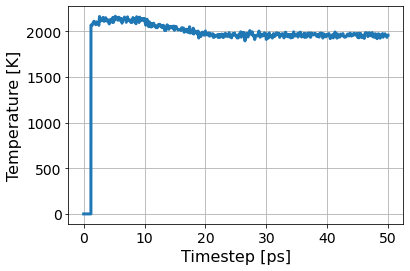

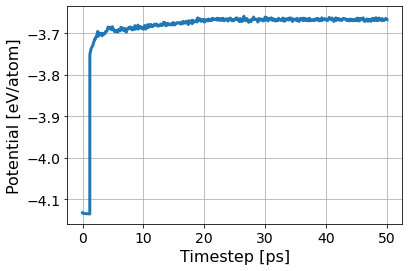

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/99359109e6ee475390ded43d721dcdf0/inputs.yaml
       RUNS/99359109e6ee475390ded43d721dcdf0
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/99359109e6ee475390ded43d721dcdf0/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [25:34<00:00, 61.38s/cell] 


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/99359109e6ee475390ded43d721dcdf0/inputs.yaml
       RUNS/99359109e6ee475390ded43d721dcdf0
Predicted melting temperature for this potential:  1929.7499502487562
95% confidence interval:  3.5323947685659514
Fraction of system solid:  0.111328125
Fraction of system liquid:  0.8682725694444444
Simulation Success Flag 0.0
Crystal Structure Info:  [ 513.   45.   27.   22.    0. 4001. 4608.]


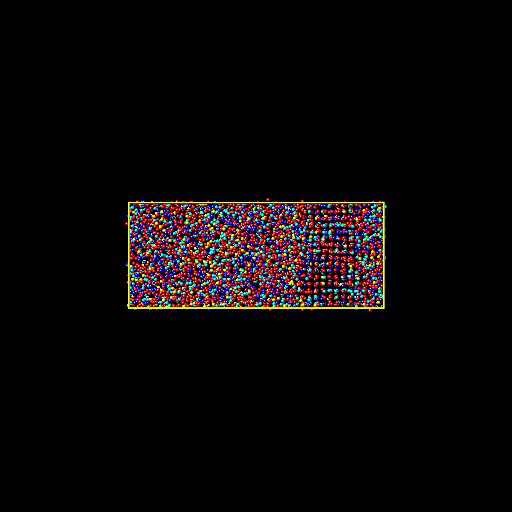

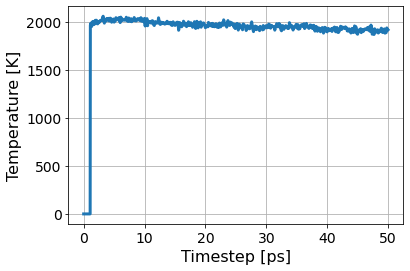

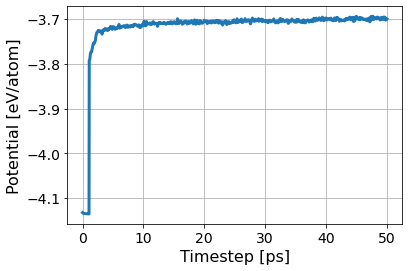

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7949879edc6e441ca78c985143cef469/inputs.yaml
       RUNS/7949879edc6e441ca78c985143cef469
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/7949879edc6e441ca78c985143cef469/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing:  52%|??????    | 13/25 [00:20<00:05,  2.02cell/s]

In [ ]:
n_steps = 40 #number of expirements
all_inds = set(range(len(y))) #set indexes
actaul_exp = np.sum(in_train)-len(initial_data)
gif_images = [] #list to save gifs as 2D array

history_train = [list(set(np.where(in_train)[0].tolist()))]
current_train_inds = []
#reset_comps = all_compositions.reset_index(drop=True)

#Create dataframe to save values to make into excel
saved_data = pd.DataFrame(columns=['IAF','Composition','Experiment',"Simulated Tm","Predicted Tm","Predicted Uncertainty","T_Solid","T_Liquid","Index"])
df2 = pd.DataFrame(columns = sample)

patience_counter = 0

print(len(history_train[-1]))

for i in range(n_steps):

    print("-------------------------------------------------------------")
    print("Experiment # ", i)
    
    current_train_inds = history_train[-1].copy()

    current_search_inds = list(all_inds.difference(current_train_inds))
    
    #Random Forest fitting and predicting
    model.fit(X[current_train_inds], y[current_train_inds]) #train model, with entry_number
    current_y_pred, current_y_std = model.predict(X[current_search_inds], return_std=True) #pred

    # ACQUISITION FUNCTIONS
    
    # EARLY STOPPING / ACQUISITION
    
    iaf = "Random"
    
    if iaf == "MEI":
    
        index_of_prediction = np.argmax(current_y_pred)    # MEI   
        
        if np.max(current_y_pred) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0
    
    elif iaf == "UCB":
        
        index_of_prediction = np.argmax([sum(x) for x in zip(current_y_pred, current_y_std)]) # UCB     
        
        if np.max([sum(x) for x in zip(current_y_pred, current_y_std)]) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0        
    
    elif iaf == "MLI":
    
        index_of_prediction = np.argmax(np.divide(current_y_pred - np.max(y[current_train_inds]), current_y_std)) # MLI
    
        if np.max(current_y_pred) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0
    
    
    elif iaf == "MU":
        
        index_of_prediction = np.argmax(current_y_std) # MU
        
        if np.max(current_y_std) < 50:
            patience_counter +=1
        else:
            patience_counter = 0
        
        
    else:
        index_of_prediction = np.random.choice(list(range(len(current_search_inds))))          # Random    
    
#     if patience_counter > 15:
#         print("Early Stop")
#         break
        
    chosen_index_forsimul = current_search_inds[index_of_prediction] #different than other codes   
    composition_forsimul = all_compositions.iloc[chosen_index_forsimul] #compositions for simulation
    
    #printing index and compistion
    print(chosen_index_forsimul)
    print(list(composition_forsimul))

    # RUNNING MELTHEAS SIM

    # setting inputs
    sim_gif = []
    flag = False
    plus = 0.50
    minus = 0.25    
    iteration = 0
    
    T_ROM = current_y_pred[index_of_prediction]    
    
    while (flag == False):
        inputs = getSimToolInputs(MeltHEA)
        
        random_seed = int(np.random.randint(1,10000,1)[0])
        velocity_seed = int(np.random.randint(1,10000,1)[0])
        
        inputs.rand_seed.value = random_seed
        inputs.velocity_seed.value = velocity_seed
                
        inputs.time.value = 50000
        inputs.box_length.value = 18
        c1, c2, c3, c4, c5 = list(composition_forsimul)
        inputs.composition1.value = c1
        inputs.composition2.value = c2
        inputs.composition3.value = c3
        inputs.composition4.value = c4
        inputs.composition5.value = c5
        
        inputs.Tsolid.value = (T_ROM-(T_ROM*minus))
        inputs.Tliquid.value = (T_ROM+(T_ROM*plus))

        # running and outputs 
        r = Run(MeltHEA, inputs)

        melting_temperature_obtained = r.read('melting_temperature')
        flag = r.read('successful')
        fraction_solid = r.read('fraction_solid')
        fraction_liquid = r.read('fraction_liquid')
        sim_gif.append(r.read('final_snapshot'))

        print ("Predicted melting temperature for this potential: ", (r.read('melting_temperature')))
        print ("95% confidence interval: ", (r.read('melting_temperature_ci')))
        print ("Fraction of system solid: ", (r.read('fraction_solid')))
        print ("Fraction of system liquid: ", (r.read('fraction_liquid')))
        print ("Simulation Success Flag", (r.read('successful')))
        print ('Crystal Structure Info: ', r.read('counts_array'))
        display(r.read('final_snapshot'))

        if (flag == False):
            if fraction_solid >= fraction_liquid:
                T_ROM += T_ROM*.05 #~80
            elif fraction_liquid >= fraction_solid:
                T_ROM -= T_ROM*.05 #~80
                
         #Graph from the melting workflow
        import matplotlib.pyplot as plt
        #Total number of atoms for 8x8 BCC unit cell cross-section and user input box-length
        if inputs.crystal_structure.value == 'bcc':
            atom_count = 8*8*2*inputs.box_length.value

        #Total number of atoms for 8x8 FCC unit cell cross-section and user input box-length
        elif inputs.crystal_structure.value == 'fcc':
            atom_count = 8*8*4*inputs.box_length.value

        ts = r.read('time_series')

        temperature = r.read('temperature_series')
        plt.plot((ts/1000),temperature,linewidth=3)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Timestep [ps]',fontsize=16)
        plt.ylabel('Temperature [K]',fontsize=16)
        plt.grid()
        plt.show()

        potential_energy = r.read('potential_energy_series')
        plt.plot((ts/1000),np.divide(potential_energy,atom_count),linewidth=3)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Timestep [ps]',fontsize=16)
        plt.ylabel('Potential [eV/atom]',fontsize=16)
        plt.grid()
        plt.show() 

    y[chosen_index_forsimul] = melting_temperature_obtained
    
    #Ending when desired temp found
    if melting_temperature_obtained > 2600:
        continue

    current_train_inds.append(chosen_index_forsimul) #from inputs choosing untrained indexes randomly
    history_train.append(current_train_inds) #storage list, of sets of values created throughout sequential learning
    
    composition_string = " ".join([i + ' ' + str(j) for i, j in zip(["Cr","Co","Cu","Fe","Ni"], composition_forsimul)])
    
    T_Solid = inputs.Tsolid.value
    T_Liquid = inputs.Tliquid.value
    
    
    #Creating dataframe for Animation
    data = pd.DataFrame([iaf,composition_string, actaul_exp, melting_temperature_obtained, current_y_pred[index_of_prediction],
                         current_y_std[index_of_prediction], T_Solid, T_Liquid,chosen_index_forsimul, random_seed, velocity_seed])
    data = data.T
    data = data.rename(columns = {0:'IAF', 1:'Composition',2:'Experiment',3: "Simulated Tm",4: "Predicted Tm",5:"Predicted Uncertainty",6:"T_Solid",7:"T_Liquid",8:"Index", 9:"RandomSeed", 10:"VelocitySeed"})
    saved_data = saved_data.append(data)
    actaul_exp = actaul_exp + 1
    
    #Saving Information into file
    files_to_saved_data = saved_data
    if list_seq_learn:
        files_to_saved_data = saved_data.append(seq_learn_data)
    files_to_saved_data = files_to_saved_data.sort_values(by='Experiment')
    
    csv_file_name2 = '{0}_melting_8labels50pico{1}.csv'.format(iaf,len(list_seq_learn))
    files_to_saved_data.to_csv(csv_file_name2, index = False)
    
    #Getting Images for Gif
    gif_images.append(sim_gif)
    

In [ ]:
display(saved_data)

In [ ]:
#print(all_compositions.iloc[561])
print(len(current_y_pred))
print(len(all_compositions))

# Save Runs Into CSV

In [ ]:
if list_seq_learn:
    saved_data = saved_data.append(seq_learn_data)
saved_data = saved_data.sort_values(by='Experiment')
display(saved_data)

In [ ]:
csv_file_name2 = '{0}_melting_8labels50pico{1}.csv'.format(iaf,len(list_seq_learn))
saved_data.to_csv(csv_file_name2, index = False)